# Plotting basic properties

In this notebook we want to visualize the basic statistics of the graph database. 

In [2]:
import src.file_management as file_management
import pandas
import numpy as np
import matplotlib.pyplot as plt
import src.plot_utils as plot_utils

In [3]:
data = {}
time_created = {}

---
##  Node label occurrences:

In [42]:
property_name= "node_label_occurrences"

#### Loading data from JSON file:
We load the data from the most recently created json file that contains data for the node label occurrences.

In [43]:
data[property_name], time_created[property_name] = file_management.load_statistics(property_name) # this returns a dict and a datetime object


#### Preparing data for plotting:

In [44]:
###########################################
# SET PARAMETERS HERE:
min_occurrences = 4
no_columns = 2
# we used the combinations
# (min_occurrences = 4, no_columns = 2) and 
# (min_occurrences = 0, no_columns = 3)

first_part = False 
# if TRUE print all node labels with at least "min_occurencres" occurences, 
# otherwise all node labels with LESS THAN "min_occurencres" occurences
###########################################

# Parse str to int:
data[property_name]['NodeLabel'] = {int(i): data[property_name]['NodeLabel'][i] for i in data[property_name]['NodeLabel']} 
data[property_name]['Occurrences'] = {int(i): data[property_name]['Occurrences'][i] for i in data[property_name]['Occurrences']} 
#print(data[property_name]['NodeLabel'])

# cut data (only print the labels with at least "min_occurrences" occurrences in the graph)
if min_occurrences > 0:
    max_index = next(x[0] for x in enumerate(data[property_name]['Occurrences'].values()) if x[1] < min_occurrences)
else:
    max_index = len(data[property_name]['Occurrences'].values())
print("max_index:", max_index)

# Extract data for axes:
if first_part:
    node_labels = list(data[property_name]['NodeLabel'].values())[0:max_index]
    occurrences = list(data[property_name]['Occurrences'].values())[0:max_index]
else:
    node_labels = list(data[property_name]['NodeLabel'].values())[max_index:]
    occurrences = list(data[property_name]['Occurrences'].values())[max_index:]
    
# remove dummy labels:
for i in range(len(node_labels)):
    if 'DUMMY' in node_labels[i]:
        node_labels[i].remove('DUMMY')
    
    
node_labels = [node_labels[i][0] for i in range(len(node_labels))]
#print(node_labels)

# Divide data into three parts (for subplots):
y_pos = np.arange(len(node_labels))


# could happen that with other paramters (other min_occurences) the following partition has to be adjusted:
if no_columns == 2:
    node_labels_split = [node_labels[0:int(len(node_labels)/2)+1], node_labels[int(len(node_labels)/2)+1:]]
    occurrences_split = [occurrences[0:int(len(occurrences)/2)+1], occurrences[int(len(occurrences)/2)+1:]]
    y_pos_split = [y_pos[0:int(len(y_pos)/2)+1], y_pos[0:int(len(y_pos)/2)]]
else:
    node_labels_split = [node_labels[0 : int(len(node_labels)/3)+1], 
                         node_labels[int(len(node_labels)/3)+1 : int(2 * len(node_labels)/3) +1], 
                         node_labels[int(2 * len(node_labels)/3)+1 : ]]
    occurrences_split = [occurrences[0 : int(len(occurrences)/3)+1], 
                         occurrences[int(len(occurrences)/3)+1 : int(2 * len(occurrences)/3)+1], 
                         occurrences[int(2 * len(occurrences)/3)+1 : ]]
    y_pos_split = [y_pos[0 : int(len(y_pos)/3)+1], y_pos[0 : int(len(y_pos)/3)+1], y_pos[0 : int(len(y_pos)/3)]] #+1 wegen Rest 2 mod 3
print(len(node_labels_split[0]))
print(len(node_labels_split[1]))
#print(len(node_labels_split[2]))

max_index: 89
65
64


#### Creating the plot:

Plot saved as plots/plot__node_label_occurrences__1612941074.pdf.


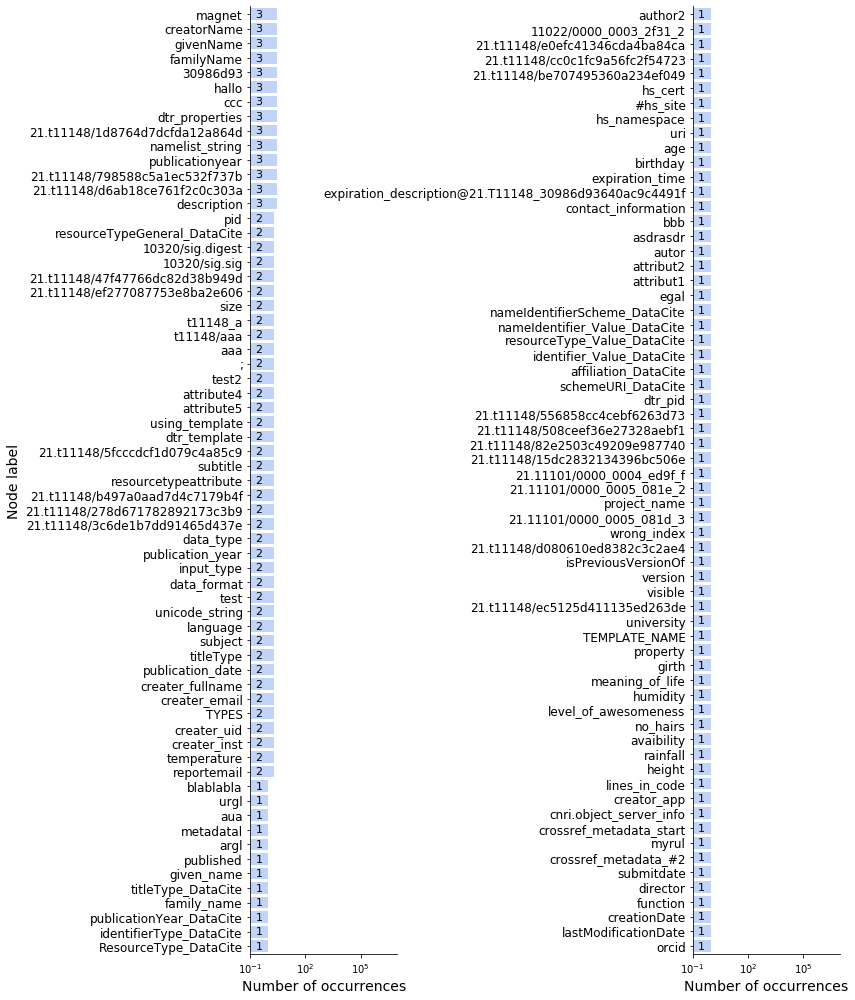

In [46]:
# Create no_columns subplots of the node label occurrences data:
if no_columns == 2:
    figsize_x = 12
    figsize_y = 14
    if first_part:
        fontsize_labels = 13
        fontsize_numbers = 13
        numbers_xpos = 0.3
    else:
        fontsize_labels = 12
        fontsize_numbers = 11
        numbers_xpos = 0.2
    
else:
    figsize_x = 16
    figsize_y = 20
    fontsize_labels = 11
    fontsize_numbers = 12
    numbers_xpos = 0.01

fig, axs = plt.subplots(nrows=1, ncols=no_columns, sharex = True, figsize = (figsize_x, figsize_y))

for i in range(no_columns):
    axs[i].barh(y_pos_split[i], occurrences_split[i], align='center', color='cornflowerblue', alpha=0.4)
    axs[i].set_yticks(y_pos_split[i])
    axs[i].set_yticklabels(node_labels_split[i])
    axs[i].yaxis.set_tick_params(labelsize=fontsize_labels)
    axs[i].invert_yaxis()  # labels arranged top-to-bottom

    axs[i].set_xlabel('Number of occurrences',  fontsize=14)

    
    axs[i].set_xscale("log")
    if not first_part:
        axs[i].set_xlim(0.1,10**7) 
        # use same scale for last part (number of occurrences are very small compared to first part)

    # show numbers for each bar:
    for j, v in enumerate(occurrences_split[i]):
        axs[i].text(numbers_xpos, j + .2, str(v), color='black', fontsize=fontsize_numbers)#, weight='bold')

    
    axs[i].margins(x=0.4, y=0.002)
    
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    
    
axs[0].set_ylabel('Node label', fontsize=14)
#fig.suptitle('Node Labels and their Occurrences\n(data accessed on {})'.format(time_created[property_name]), weight='bold', y=1.03, fontsize=16)

plt.tight_layout()
plt.subplots_adjust(wspace=2.0) #space between subplots

#save to plots folder:
#file_management.save_plot(property_name)
                          
plt.show()


---
## Relationship type occurrences:

In [47]:
property_name= "relationship_type_occurrences"

#### Loading data from JSON file:
We load the data from the most recently created json file that contains data for property_x.

In [48]:
data[property_name], time_created[property_name] = file_management.load_statistics(property_name) # this returns a dict and a datetime object

#### Preparing data for plotting:

In [49]:
###########################################
# SET PARAMETERS HERE:
min_occurrences = 8
no_columns = 2

# we used the combinations
# (min_occurrences = 4, no_columns = 2) and 
# (min_occurrences = 0, no_columns = 3)

first_part = False 
# if TRUE print all relationship types with at least "min_occurencres" occurences, 
# otherwise all node labels with LESS THAN "min_occurencres" occurences
###########################################

# Parse str to int:

data[property_name]['RelationshipType'] = {int(i): data[property_name]['RelationshipType'][i] for i in data[property_name]['RelationshipType']} 
data[property_name]['Occurrences'] = {int(i): data[property_name]['Occurrences'][i] for i in data[property_name]['Occurrences']} 
  
# cut data: (only print the types with at least "min_occurrences" occurrences in the graph)
if min_occurrences > 0:
    max_index = next(x[0] for x in enumerate(data[property_name]['Occurrences'].values()) if x[1] < min_occurrences)
else:
    max_index = len(data[property_name]['Occurrences'].values())
print("max_index:", max_index)

# Extract data for axes:
if first_part:
    relationship_types = list(data[property_name]['RelationshipType'].values())[0:max_index]
    occurrences = list(data[property_name]['Occurrences'].values())[0:max_index]
else:
    relationship_types = list(data[property_name]['RelationshipType'].values())[max_index:]
    occurrences = list(data[property_name]['Occurrences'].values())[max_index:]
y_pos = np.arange(len(relationship_types))




# Divide data into the right amount of parts/columns (for subplots):

l = len(relationship_types)
if no_columns == 2:
    relationship_types_split = [relationship_types[0:int(l/2)+l%2], relationship_types[int(l/2)+l%2:]]
    occurrences_split = [occurrences[0:int(l/2)+l%2], occurrences[int(l/2)+l%2:]]
    y_pos_split = [y_pos[0:int(l/2)+l%2], y_pos[0:int(l/2)]]
    
else: 
    # could happen that with other paramters (other min_occurences) the partition has to be adjusted
    relationship_types_split = [relationship_types[0 : int(len(relationship_types)/3)], 
                         relationship_types[int(len(relationship_types)/3) : int(2 * len(relationship_types)/3) ], 
                         relationship_types[int(2 * len(relationship_types)/3) : ]]
    occurrences_split = [occurrences[0 : int(len(occurrences)/3)], 
                         occurrences[int(len(occurrences)/3) : int(2 * len(occurrences)/3)], 
                         occurrences[int(2 * len(occurrences)/3) : ]]
    y_pos_split = [y_pos[0 : int(len(y_pos)/3)], y_pos[0 : int(len(y_pos)/3)], y_pos[0 : int(len(y_pos)/3)]] #+1 wegen Rest mod 3

#old variant with two columns:
#relationship_types_split = [relationship_types[0:int(len(relationship_types)/2)], relationship_types[int(len(relationship_types)/2):]]
#occurrences_split = [occurrences[0:int(len(occurrences)/2)], occurrences[int(len(occurrences)/2):]]
#y_pos_split = [y_pos[0:int(len(y_pos)/2)], y_pos[0:int(len(y_pos)/2)+len(y_pos)%2]]

print(len(relationship_types_split[0]))
print(len(relationship_types_split[1]))
print(len(y_pos_split[0]))
print(len(y_pos_split[1]))


max_index: 89
65
65
65
65


#### Creating the plot:

Plot saved as plots/plot__relationship_type_occurrences__1612941112.pdf.


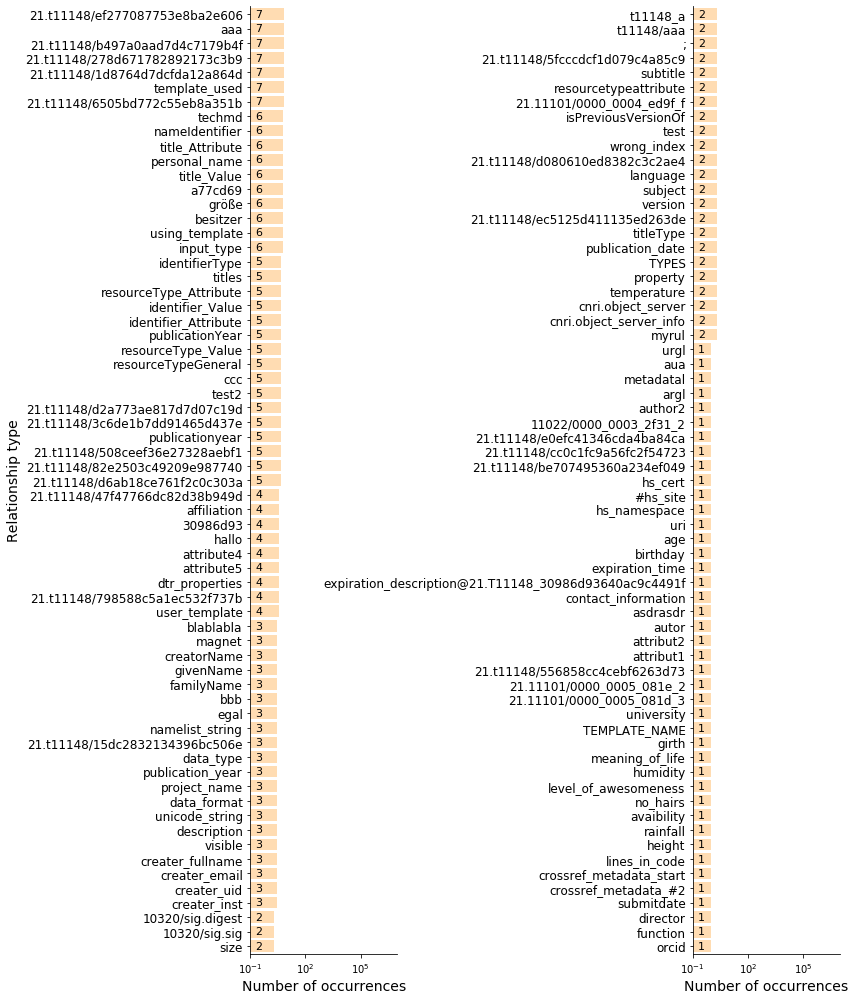

In [50]:
# Create 2 subplots of the relationship type occurrences data:
if no_columns == 2:
    figsize_x = 12
    figsize_y = 14
    if first_part:
        fontsize_labels = 13
        fontsize_numbers = 13
        numbers_xpos = 0.6
    else:
        fontsize_labels = 12
        fontsize_numbers = 11
        numbers_xpos = 0.2
else:
    figsize_x = 16
    figsize_y = 20
    fontsize_labels = 10
    fontsize_numbers = 12
    numbers_xpos = 0.02
    
fig, axs = plt.subplots(nrows=1, ncols=no_columns, sharex = True, figsize = (figsize_x, figsize_y))

for i in range(no_columns):
    axs[i].barh(y_pos_split[i], occurrences_split[i], align='center', color='darkorange', alpha=0.3)
    axs[i].set_yticks(y_pos_split[i])
    axs[i].set_yticklabels(relationship_types_split[i])
    axs[i].yaxis.set_tick_params(labelsize=fontsize_labels)
    axs[i].invert_yaxis()  # labels arranged top-to-bottom

    axs[i].set_xlabel('Number of occurrences', fontsize=14)
    axs[i].set_xscale("log")
    if not first_part:
        axs[i].set_xlim(0.1,10**7) 
        # use same scale for last part (number of occurrences are very small compared to first part)


    # show numbers for each bar:
    for j, v in enumerate(occurrences_split[i]):
        axs[i].text(numbers_xpos, j + .2, str(v), color='black', fontsize=fontsize_numbers)
    
    axs[i].margins(x=0.4, y=0.002)
    
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    
    
axs[0].set_ylabel('Relationship type', fontsize=14)
#fig.suptitle('Relationship Types and their Occurrences\n(data accessed on {})'.format(time_created[property_name]), weight='bold', y=1.03, fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=2) #space between subplots

#save to plots folder:
file_management.save_plot(property_name)
                          
plt.show()


## Eccentricities (old plot!)

#### Loading data from JSON file:

In [8]:
sample_size = 1000
property_name = "eccentricities_sample_{}".format(sample_size)
data[property_name], time_created[property_name] = file_management.load_statistics(property_name) # this returns a dict and a datetime object


#### Preparing data for plotting:

In [9]:
ecc_data = data[property_name]

ecc_data = [ecc_data['distance'][str(i)] for i in range(sample_size)]

#### Creating the plot:

Plot saved as plots/plot__eccentricities_sample_1000__1608941140.pdf.


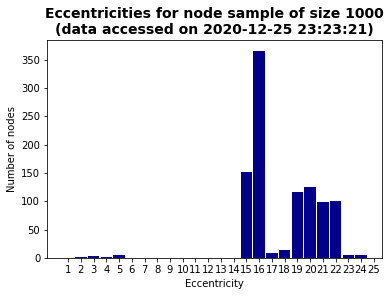

In [10]:
bins = np.arange(min(ecc_data) - 1, max(ecc_data) + 1.5) - 0.5

plt.hist(ecc_data, bins, color='darkblue', rwidth=0.9)
plt.title('Eccentricities for node sample of size {}\n(data accessed on {})'.format(sample_size, time_created[property_name]), weight='bold', fontsize=14)
plt.xlabel('Eccentricity')
plt.ylabel('Number of nodes')
plt.xticks(bins + 0.5)

#save to plots folder:
#file_management.save_plot(property_name)

plt.show()
